In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Teoría

El objetivo es integrar, numéricamente, un sistema de Ecuaciónes Diferenciales Ordinarias (ODEs):

$$\frac{d\vec{x}}{dt} = \vec{f}(\vec{x},t)$$

en el intérvalo $t\in [a,b]$, con condición inicial $\vec{x}(a)$, donde $\vec{x}\in (\mathbb{R} \to \mathbb{R}^n)$ y $\vec{f} \in (\mathbb{R}^{n+1}\to \mathbb{R}^n)$.

# Método de Euler

Consiste en calcular $x(t_0),x(t_1),...,x(t_j),...,x(t_k)$ con 

$$t_{j+1} = t_j + dt,$$

$$t_0=a$$ y

$$t_k=b,$$

usando

$$x(t_{j+1}) = x(t_j) + f(x(t_j),t_j)\,dt$$

para alguna constante relativamente *pequeña* $dt$ (que Pancho llamó $h$).

In [2]:
def euler(f,x,t,dt):
    """
    Calcula un paso de integración del método de Euler.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """
    return x + dt*f(x,t)

# Método Runge Kutta orden 2 (RK2)

Lo veremos más adelante.

In [3]:
def rk2(f,x,t,dt):
    """
    Calcula un paso de integración del método de Runge Kutta orden 2.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """
    x1 = x + 0.5*dt*f(x,t)
    return x + dt*f(x1,t+0.5*dt)

# Método Runge Kutta orden 4 (RK4)

Lo veremos más adelante.

In [4]:
def rk4(f,x,t,dt):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """    
    k1 = f(x,t)
    k2 = f(x+0.5*dt*k1,t+0.5*dt)
    k3 = f(x+0.5*dt*k2,t+0.5*dt)
    k4 = f(x+dt*k3,t+dt)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

# Integrador de ODE

In [5]:
def integrador_ode(m,f,x0,a,b,k):
    """
    Integra numéricamente la ODE
    
        dx/dt = f(x,t)
        
    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.
    
    Argumentos de entrada:
    
        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        x0 = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
    
    Retorna:
    
        t : R^{k+1} , t_j = a+j*dt para j=0,1,...,k
        x : R^{k+1,n} , x_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k
        
    donde a+k*dt = b.
    """  
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt)
    return t,x

# Ejemplo 1

Resuelva con los tres métodos Euler, RK2 y RK4 el siguiente problema de valores iniciales:
$$
\frac{dx}{dt} = -x+\sin(2\pi t), \;\;\;\;\;\; 0 \le t \le 1\; , 
\;\;\;\;\; x(0) = 1.0
$$
en el intervalo $0 \le t \le 1$ con un paso de integración $dt=0.1$ 

Grafique tanto la solución obtenida y compare con la exacta: 

$$
x_{\mathrm{exacta}}(t)=\Bigl(1+\frac{2\pi}{1+4\pi^2}\Bigr)e^{-t}+\frac{\sin(2\pi t)-2\pi
    \cos(2\pi t)}{1+4\pi^2},
$$

Grafique el error global, $\mathrm{error}(t) = |x(t)-x_{\mathrm{exacta}}(t)|$

In [6]:
def f(x,t):
    return np.array([-x[0]+np.sin(2.0*np.pi*t)])

x0=np.array([1.0])
a=0.0
b=1.0
k=11

t_e,x_e = integrador_ode(euler,f,x0,a,b,k)
t_2,x_2 = integrador_ode(rk2,f,x0,a,b,k)
t_4,x_4 = integrador_ode(rk4,f,x0,a,b,k)

In [7]:
t_e,x_e

(array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
        0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
        0.90909091, 1.        ]),
 array([[1.        , 0.90909091, 0.87559545, 0.87868968, 0.88879257,
         0.87669775, 0.82261   , 0.72221523, 0.58785479, 0.44442968,
         0.32133316, 0.24297189]]))

In [8]:
t_2,x_2

(array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
        0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
        0.90909091, 1.        ]),
 array([[1.        , 0.93883519, 0.92383648, 0.9298938 , 0.92780419,
         0.89331849, 0.81463493, 0.69595849, 0.55599451, 0.42185346,
         0.32030064, 0.26912796]]))

In [9]:
t_4,x_4

(array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
        0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
        0.90909091, 1.        ]),
 array([[1.        , 0.93760851, 0.92116088, 0.9260181 , 0.92337193,
         0.88916583, 0.81152678, 0.69434693, 0.55587619, 0.42277124,
         0.32148912, 0.26975659]]))

In [10]:
def x_exacta(t):
    return (1.0+2.0*np.pi/(1.0+4.0*np.pi**2))*np.exp(-t) + (np.sin(2.0*np.pi*t)-2.0*np.pi*np.cos(2.0*np.pi*t))/(1.0+4.0*np.pi**2)

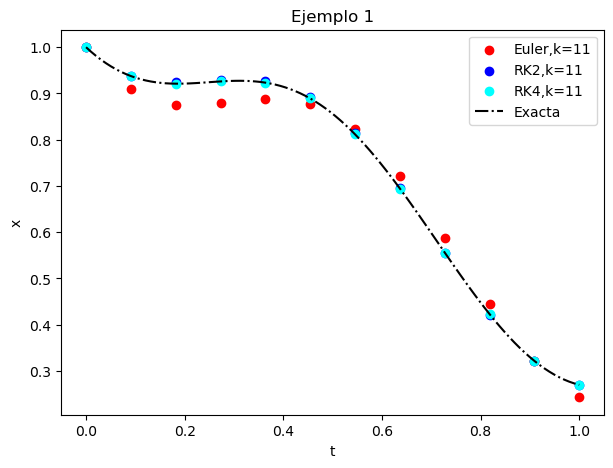

In [11]:
plt.rcParams["figure.figsize"] = (7,5) # Dimensions of the figure
plt.rcParams['figure.dpi'] = 100 # Resolucion
plt.title("Ejemplo 1")
plt.xlabel("t")
plt.ylabel("x")

# Euler
plt.scatter(t_e,x_e[0,:],label='Euler,k='+str(k),color='red',linestyle='-')

# RK2
plt.scatter(t_2,x_2[0,:],label='RK2,k='+str(k),color='blue',linestyle='-')

# RK4
plt.scatter(t_4,x_4[0,:],label='RK4,k='+str(k),color='cyan',linestyle='-')

# Exacta
t = np.linspace(a,b,100)
plt.plot(t,x_exacta(t),label='Exacta',color='black',linestyle='-.')

plt.legend()
plt.show()

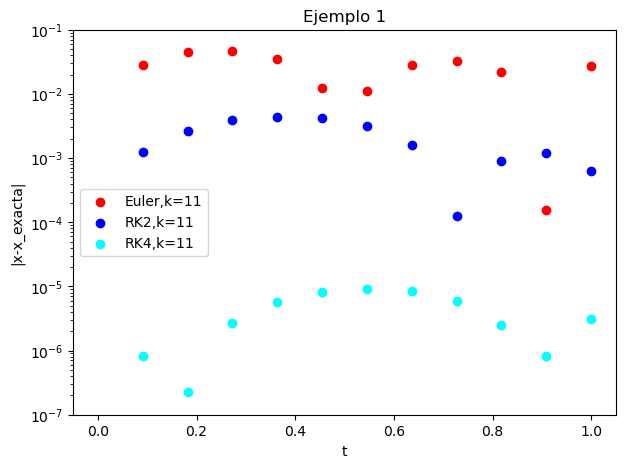

In [12]:
plt.rcParams["figure.figsize"] = (7,5) # Dimensions of the figure
plt.rcParams['figure.dpi'] = 100 # Resolucion
plt.title("Ejemplo 1")
plt.xlabel("t")
plt.ylabel("|x-x_exacta|")
plt.ylim(10**(-7),10**(-1))

#plt.xscale('log')
plt.yscale('log')

# Euler
err_e = np.abs(x_e[0,:]-x_exacta(t_e))
plt.scatter(t_e,err_e,label='Euler,k='+str(k),color='red',linestyle='-')

# RK2
err_2 = np.abs(x_2[0,:]-x_exacta(t_e))
plt.scatter(t_2,err_2,label='RK2,k='+str(k),color='blue',linestyle='-')

# RK4
err_4 = np.abs(x_4[0,:]-x_exacta(t_e))
plt.scatter(t_4,err_4,label='RK4,k='+str(k),color='cyan',linestyle='-')

plt.legend()
plt.show()

# Ejemplo 2

Considere el problema de valores iniciales para la ecuación de la dinámica de un péndulo simple de longitud $l$
$$
\frac{d^2\theta}{d t^2} = - \frac{g}{l} \sin{(\theta)}, \quad
\theta(0)=\theta_0, \quad \frac{d\theta}{d t}(0)= \dot{\theta}_0,
$$
donde $g$ es la acelaración de la gravedad. Definiendo  $u := \dot{\theta} = \frac{d\theta}{dt}$ esta ecuación de segundo orden se puede escribir como un sistema de dos ecuaciones de primer orden

\begin{eqnarray}
\frac{d\theta}{d t} &=& u \hspace{5cm} \\
\frac{d u}{d t} &=& - \frac{g}{l} \sin{(\theta)}
\end{eqnarray}

mientras que las condiciones iniciales transformadas quedan $(u(0),\theta(0))=(\dot{\theta}_0,\theta_0)$.

Para $g=10 m/s^2$, $l=1 m$, $0\le t\le 10$ y las siguientes condiciones iniciales $u(0)=0$ y $\theta(0)=0.5$, integre numéricamente este sistema de dos ecuaciones diferenciales ordinarias acopladas y luego grafique $\theta$ vs. $t$. 

Luego grafique $u$ vs $\theta$.

Recuerde eligir un adecuado valor del número de pasos de integración $k$.

In [13]:
# Identificamos x[0]=theta y x[1]=u.
g = 10.0
l = 1.0
def f(x,t):
    return np.array([x[1],-g/l*np.sin(x[0])])

x0=np.array([0.5,0.0])
a=0.0
b=10.0
k=200

t_e,x_e = integrador_ode(euler,f,x0,a,b,k)
t_2,x_2 = integrador_ode(rk2,f,x0,a,b,k)
t_4,x_4 = integrador_ode(rk4,f,x0,a,b,k)

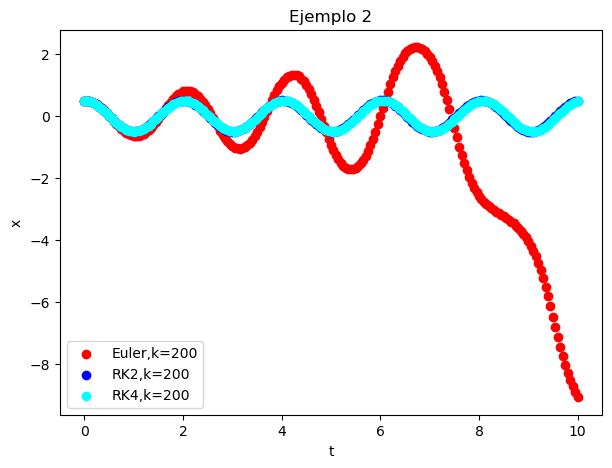

In [14]:
plt.rcParams["figure.figsize"] = (7,5) # Dimensions of the figure
plt.rcParams['figure.dpi'] = 100 # Resolucion
plt.title("Ejemplo 2")
plt.xlabel("t")
plt.ylabel("x")

# Euler
plt.scatter(t_e,x_e[0,:],label='Euler,k='+str(k),color='red',linestyle='-')

# RK2
plt.scatter(t_2,x_2[0,:],label='RK2,k='+str(k),color='blue',linestyle='-')

# Rk4
plt.scatter(t_4,x_4[0,:],label='RK4,k='+str(k),color='cyan',linestyle='-')


plt.legend()
plt.show()

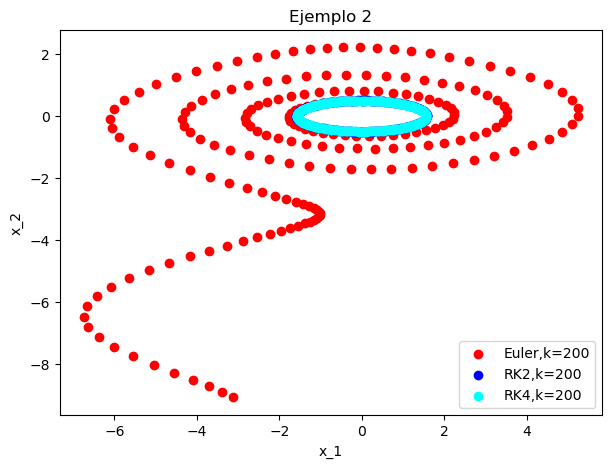

In [15]:
plt.rcParams["figure.figsize"] = (7,5) # Dimensions of the figure
plt.rcParams['figure.dpi'] = 100 # Resolucion
plt.title("Ejemplo 2")
plt.xlabel("x_1")
plt.ylabel("x_2")

# Euler
plt.scatter(x_e[1,:],x_e[0,:],label='Euler,k='+str(k),color='red',linestyle='-')

# RK2
plt.scatter(x_2[1,:],x_2[0,:],label='RK2,k='+str(k),color='blue',linestyle='-')

# Rk4
plt.scatter(x_4[1,:],x_4[0,:],label='RK4,k='+str(k),color='cyan',linestyle='-')

plt.legend()
plt.show()